In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"FEV.CSV")

In [3]:
df = data.copy()

In [4]:
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [5]:
## here we find the information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [6]:
## here we check the null value.
df.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

## Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.


In [8]:
## Your task is to filter out EVs that meet these criteria.
filtered_evs = df[
    (df["Minimal price (gross) [PLN]"] <= 350000) & 
    (df["Range (WLTP) [km]"] >= 400)
]
print("Filtered EVs by Budget and Range:")
print(filtered_evs[["Make", "Model", "Minimal price (gross) [PLN]", "Range (WLTP) [km]","Battery capacity [kWh]"]])

Filtered EVs by Budget and Range:
             Make                        Model  Minimal price (gross) [PLN]  \
0            Audi            e-tron 55 quattro                       345700   
8             BMW                          iX3                       282900   
15        Hyundai          Kona electric 64kWh                       178400   
18            Kia                 e-Niro 64kWh                       167990   
20            Kia                 e-Soul 64kWh                       160990   
22  Mercedes-Benz                          EQC                       334700   
39          Tesla  Model 3 Standard Range Plus                       195490   
40          Tesla           Model 3 Long Range                       235490   
41          Tesla          Model 3 Performance                       260490   
47     Volkswagen         ID.3 Pro Performance                       155890   
48     Volkswagen                   ID.3 Pro S                       179990   
49     Volkswagen 

In [9]:
# Part b: Group filtered EVs by manufacturer
grouped_by_make = filtered_evs.groupby("Make")

# Display grouped data
print("\nGrouped EVs by Manufacturer:")
for make, group in grouped_by_make:
    print(f"Manufacturer: {make}")
    print(group[["Model", "Minimal price (gross) [PLN]", "Range (WLTP) [km]", "Battery capacity [kWh]"]])




Grouped EVs by Manufacturer:
Manufacturer: Audi
               Model  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
0  e-tron 55 quattro                       345700                438   

   Battery capacity [kWh]  
0                    95.0  
Manufacturer: BMW
  Model  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
8   iX3                       282900                460   

   Battery capacity [kWh]  
8                    80.0  
Manufacturer: Hyundai
                  Model  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
15  Kona electric 64kWh                       178400                449   

    Battery capacity [kWh]  
15                    64.0  
Manufacturer: Kia
           Model  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
18  e-Niro 64kWh                       167990                455   
20  e-Soul 64kWh                       160990                452   

    Battery capacity [kWh]  
18                    64.0  
20                    64.0  
Manufacturer: Me

In [10]:
## # Part c: Calculate average battery capacity for each manufacturer
average_battery_capacity = (
    filtered_evs.groupby("Make")["Battery capacity [kWh]"]
    .mean()
    .reset_index()
)

# Renaming columns for clarity
average_battery_capacity.columns = ["Manufacturer", "Average Battery Capacity (kWh)"]

# Display the results
print("\nAverage Battery Capacity for Each Manufacturer:")
print(average_battery_capacity)



Average Battery Capacity for Each Manufacturer:
    Manufacturer  Average Battery Capacity (kWh)
0           Audi                       95.000000
1            BMW                       80.000000
2        Hyundai                       64.000000
3            Kia                       64.000000
4  Mercedes-Benz                       80.000000
5          Tesla                       68.000000
6     Volkswagen                       70.666667


## Task 2: You suspect some EVs have unusually high or low energy consumption. 

In [12]:
## Find the outliers in the mean - Energy consumption [kWh/100 km] column
# Calculate the IQR to detect outliers
q1 = df["mean - Energy consumption [kWh/100 km]"].quantile(0.25)
q2 = df["mean - Energy consumption [kWh/100 km]"].quantile(0.75)
iqr = q2 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q2 + 1.5 * iqr

# Filter out the outliers
outliers = df[
    (df["mean - Energy consumption [kWh/100 km]"] < lower_bound) | 
    (df["mean - Energy consumption [kWh/100 km]"] > upper_bound)
]

# Check if the DataFrame is empty and display appropriate message
if outliers.empty:
    print("No outliers detected in the 'mean - Energy consumption [kWh/100 km]' column.")
else:
    print("Outliers in mean Energy Consumption [kWh/100 km]:")
    print(outliers[["Make", "Model", "mean - Energy consumption [kWh/100 km]"]])

# Display bounds for reference
print(f"\nLower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")


No outliers detected in the 'mean - Energy consumption [kWh/100 km]' column.

Lower Bound: 3.75, Upper Bound: 35.35


## Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.

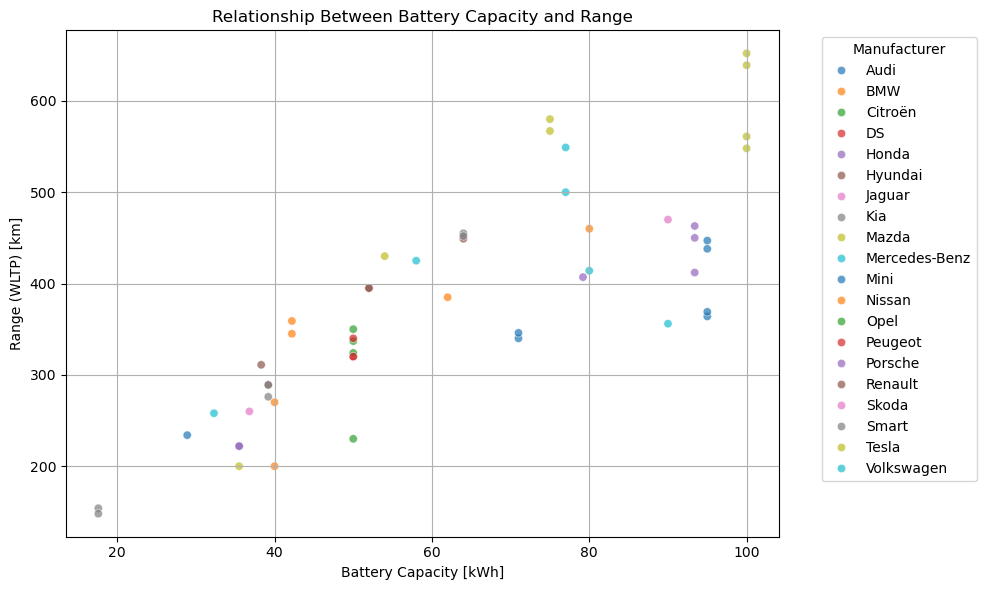

In [14]:
## a) Create a suitable plot to visualize
plt.figure(figsize=(10, 6))
sns.scatterplot( x="Battery capacity [kWh]", y="Range (WLTP) [km]",data=df,hue="Make",  palette="tab10",alpha=0.7)
# Add labels and title
plt.title("Relationship Between Battery Capacity and Range")
plt.xlabel("Battery Capacity [kWh]", )
plt.ylabel("Range (WLTP) [km]", )
plt.grid(True)
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() # Display the plot


In [15]:
# Part b: Insights
# Correlation calculation to quantify the relationship
correlation = df["Battery capacity [kWh]"].corr(df["Range (WLTP) [km]"])
print(f"Correlation between Battery Capacity and Range: {correlation:.2f}")

Correlation between Battery Capacity and Range: 0.81


## Task 4: Build an EV recommendation class. 

In [17]:
##The class should allow users to input their budget, desired range, and battery capacity
## The class should then return the top three EVs matching their criteria. 
class EVRecommendation:
    def __init__(self, data):
        """
        Initializes the EVRecommendation class with a dataset.
        :param data: DataFrame containing EV details
        """
        self.data = data

    def recommend(self, budget, desired_range, battery_capacity):
        
        # Filter EVs based on user criteria
        filtered_evs = self.data[
            (self.data["Minimal price (gross) [PLN]"] <= budget) &
            (self.data["Range (WLTP) [km]"] >= desired_range) &
            (self.data["Battery capacity [kWh]"] >= battery_capacity)
        ]

        # Sort by range, then price (ascending)
        filtered_evs = filtered_evs.sort_values(
            by=["Range (WLTP) [km]", "Minimal price (gross) [PLN]"],
            ascending=[False, True]
        )

        # Return the top three EVs
        return filtered_evs.head(3)

# Usage
# Instantiate the class with the dataset
ev_recommender = EVRecommendation(df)

# User criteria
user_budget = 350000
user_desired_range = 400
user_battery_capacity = 50

# Get recommendations
recommendations = ev_recommender.recommend(user_budget, user_desired_range, user_battery_capacity)

# Display the recommendations
print("Top 3 EV Recommendations:")
print(recommendations[["Make", "Model", "Minimal price (gross) [PLN]", "Range (WLTP) [km]", "Battery capacity [kWh]"]])


Top 3 EV Recommendations:
          Make                Model  Minimal price (gross) [PLN]  \
40       Tesla   Model 3 Long Range                       235490   
41       Tesla  Model 3 Performance                       260490   
48  Volkswagen           ID.3 Pro S                       179990   

    Range (WLTP) [km]  Battery capacity [kWh]  
40                580                    75.0  
41                567                    75.0  
48                549                    77.0  


## Task 5: Inferential Statistics – Hypothesis Testing:

In [19]:
from scipy.stats import ttest_ind
# Filter data for Tesla and Audi
tesla_data = df[df["Make"] == "Tesla"]["Engine power [KM]"]
audi_data = df[df["Make"] == "Audi"]["Engine power [KM]"]

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(tesla_data, audi_data, equal_var=False)  # Assuming unequal variances

# Display results
print("Two-Sample T-Test Results")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Significance level
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. because There is a significant difference in the average Engine power [KM] of Tesla and Audi vehicles.")
else:
    print("We fail to reject the null hypothesis. because There is no significant difference in the average Engine power [KM] of Tesla and Audi vehicles.")


Two-Sample T-Test Results
T-Statistic: 1.79
P-Value: 0.1068
We fail to reject the null hypothesis. because There is no significant difference in the average Engine power [KM] of Tesla and Audi vehicles.


video link- https://drive.google.com/file/d/1cKvrpvHd8Lsux-hxhMG-9wvz2Y_B4o6Z/view?usp=sharing